In [2]:
import pandas as pd
import numpy as np

In [89]:
genage = pd.read_csv("data/gene_version2020/source/genage_models.csv")
gene2go = pd.read_csv("data/gene_version2020/source/gene2go",delimiter='\t')

In [3]:
gene2go['Category'].value_counts()

Process      879795
Component    622275
Function     535733
Name: Category, dtype: int64

In [90]:
#选出4种模型有机体
sc = genage[genage["organism"] == "Saccharomyces cerevisiae"]  
ce = genage[genage["organism"] == "Caenorhabditis elegans"] 
dm = genage[genage["organism"] == "Drosophila melanogaster"] 
mm = genage[genage["organism"] == "Mus musculus"] 

In [87]:
gene2go = gene2go[(gene2go['Category'] == 'Component') | (gene2go['Category'] == 'Function')]
#gene2go = gene2go[gene2go['Category'] == 'Function']

In [91]:
df = mm.copy()
#在当前模型有机体中出现的GO_ID,将它转化为特征列
featureName = gene2go[gene2go["GeneID"].isin(df["entrez gene id"].tolist())]["GO_ID"].drop_duplicates()
for name in featureName:
    df[name] = 0
#对每条数据对应的GO项赋值1
for index in df.index: 
    GeneID = df.loc[index,"entrez gene id"]
    GOs = gene2go[gene2go["GeneID"] == GeneID]["GO_ID"]
    for GO in GOs:
        df.loc[index,GO] = 1
#删除列，标签替换为01
df.drop(["entrez gene id","GenAge ID","symbol","organism","name","avg lifespan change (max obsv)","lifespan effect"],axis=1,inplace=True)
df["longevity influence"].replace("Anti-Longevity",0,inplace=True)
df["longevity influence"].replace("Pro-Longevity",1,inplace=True)
df.drop(index=df[df["longevity influence"] == "Unannotated"].index.tolist(),inplace=True)
df.drop(index=df[df["longevity influence"] == "Unclear"].index.tolist(),inplace=True)

#构造DAG
nodesName = df.columns[1:]
DAG = pd.DataFrame(0,columns=nodesName,index=nodesName)
f = open("data/myData/go.obo")
lines = f.readlines()
i = 0
for line in lines:
    i = i+1
    if(i % 10000 == 0):
        print(i)
    if(line.startswith("id: ")):
        y = line[4:14]
    elif(line.startswith("is_a: ")):
        x = line[6:16]
        try:
            if(DAG.loc[x,y] == 0):
                DAG.loc[x,y] = 1
        except:
            pass

df.to_csv("data/gene_version2020/generate/ExperimentalDatasets/MM/MM-BPCCMF.csv")
DAG.to_csv("data/gene_version2020/generate/GOPath/MM/MM-BPCCMF.csv")

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000


In [93]:
df = pd.read_csv("data/gene_version2020/generate/GOPath/MM/MM-BPCCMF.csv",index_col=0)
df

,GO:0004345,GO:0005515,GO:0005536,GO:0005634,GO:0005737,GO:0005829,GO:0006006,GO:0006098,GO:0006629,GO:0006695,...,GO:0019369,GO:0019372,GO:0047066,GO:0051258,GO:0110076,GO:0002329,GO:0021522,GO:0035195,GO:0060586,GO:0071241
GO:0004345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0005515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0005536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0005634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0005737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GO:0002329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0021522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0035195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO:0060586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df.sum().sum()

1773

In [39]:
DAG.to_csv("DAG-CE.csv")

In [22]:
nodesName = gene2go[gene2go["GeneID"].isin(genage["entrez gene id"].tolist())]["GO_ID"].drop_duplicates()
DAG = pd.DataFrame(0,columns=nodesName,index=nodesName)

In [11]:
x = pd.read_csv("C:\\Users\li\Desktop\AIRE-Journal-master\Datasets\GeneratedDatasets\ExperimentalDatasets\Mouse\MM-BP.txt",
               delimiter=",")
x

,is_a,216233,218294,11739,50505,17685,16905,17216,56636,13350,...,114774,21750,22019,21752,13860,14599,55961,11607,14268,Unnamed: 103
0,GO:0007595,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,GO:0009968,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,NaN
2,GO:0032355,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,GO:0032870,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,NaN
4,GO:0035556,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,GO:0007263,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1037,GO:0030001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
1038,GO:0032271,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,NaN
1039,GO:0051493,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,NaN


In [ ]:
#spotlight调用
import requests
url="https://api.dbpedia-spotlight.org/en/spot"
params={'text': 'First documented in the 13th century, Berlin was the capital of the Kingdom of Prussia (1701–1918), the German Empire (1871–1918), the Weimar Republic (1919–33) and the Third Reich (1933–45). Berlin in the 1920s was the third largest municipality in the world. After World War II, the city became divided into East Berlin -- the capital of East Germany -- and West Berlin, a West German exclave surrounded by the Berlin Wall from 1961–89. Following German reunification in 1990, the city regained its status as the capital of Germany, hosting 147 foreign embassies.'}
headers = {'accept': 'application/json'}
r = requests.get(url, params=params,headers = headers)

print(r.status_code)

for term in r.json()["annotation"]["surfaceForm"]:
    print(term['@name'])

In [19]:
x = pd.read_csv("data/AIRE-Journal-master/Datasets/SourceData/genage_models_export_CE_13062014.tsv",index_col=None,delimiter="\t")
x

,Gene ID,Entrez Gene ID,Gene Symbol,Gene Name,Organism,Unigene ID,Ensembl ID,UniProt ID,Alias,Lifespan Effect,Phenotype Description,Longevity Influence,Max Lifespan Change,Avg Liffespan Change,Method,Bibliographic reference
1,181727.0,aak-2,AMP-Activated Kinase,Caenorhabditis elegans,Cel.17479,T01C8.1,NaN,NaN,decrease,Could be a sensor that couples energy levels a...,pro,NaN,12.0,Knockout,NaN,NaN
1,181727.0,aak-2,AMP-Activated Kinase,Caenorhabditis elegans,Cel.17479,T01C8.1,NaN,NaN,decrease,37% decrease in median lifespna in daf-2 backg...,pro,NaN,54.0,RNA interference,NaN,NaN
269,181492.0,aakb-1,AMP-Activated Kinase Beta subunit,Caenorhabditis elegans,Cel.860,F55F3.1,NaN,NaN,decrease,RNA interference resulted in decreased lifespa...,pro,NaN,NaN,RNA interference,NaN,NaN
752,176552.0,aakb-2,AMP-Activated Kinase Beta subunit,Caenorhabditis elegans,Cel.9773,Y47D3A.15,NaN,NaN,decrease,RNA interference resulted in decreased lifespa...,pro,NaN,NaN,RNA interference,NaN,NaN
1849,181736.0,aakg-2,Protein AAKG-2,Caenorhabditis elegans,NaN,NaN,NaN,NaN,increase,"aakg-2 overexpression extends mean, median, an...",pro,35.0,47.0,Overexpression,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,176237.0,zfp-1,Zinc Finger Protein,Caenorhabditis elegans,Cel.22669,F54F2.2,NaN,NaN,decrease,RNA interference shortened lifespan.,pro,NaN,NaN,RNA interference,NaN,NaN
783,174151.0,ZK1127.5,Protein ZK1127.5,Caenorhabditis elegans,Cel.13718,ZK1127.5,NaN,NaN,increase,RNA interference in adulthood extended mean li...,anti,NaN,24.0,RNA interference,NaN,NaN
786,176088.0,ZK686.2,Protein ZK686.2,Caenorhabditis elegans,Cel.9524,ZK686.2,NaN,NaN,increase,RNA interference in adulthood extended mean li...,anti,NaN,24.0,RNA interference,NaN,NaN
787,178096.0,ZK809.3,Protein ZK809.3,Caenorhabditis elegans,Cel.6565,ZK809.3,NaN,NaN,increase,RNA interference increased mean lifespan by 100%.,anti,NaN,100.0,RNA interference,NaN,NaN


In [15]:
x = np.zeros(4500)
y = np.ones(20)
np.concatenate((x,y),axis=0).var()

0.004405200093977602

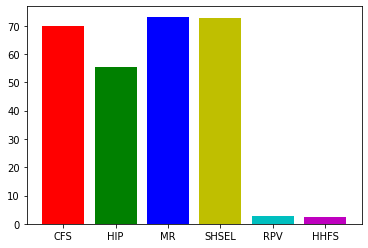

In [6]:



#['CFS','HIP','MR','SHSEL','RPV','LE-HFS'],[70,55.41,73.18,72.59,2.60,2.49],
    




import matplotlib.pyplot as plt
from cycler import cycler

#plt.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y', 'c', 'm'])
name_list = ['CFS','HIP','MR','SHSEL','RPV','HHFS']
num_list = [70,55.41,73.18,72.59,2.60,2.49]
plt.bar(range(len(num_list)), num_list,tick_label=name_list,color=['r', 'g', 'b', 'y', 'c', 'm'])
plt.show()